In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist,pdist



from sklearn import datasets
data = datasets.load_diabetes()

In [111]:
Clustering_data = data["data"]
#Clustering_data

In [112]:
X = MinMaxScaler().fit_transform(Clustering_data)
#X
y=data['target']

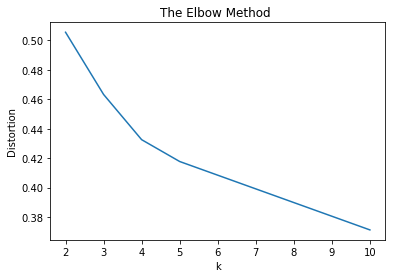

In [113]:
distortions = []
Ks = [2, 3, 4, 5, 10]
for k in Ks:
    kmeans = KMeans(n_clusters = k)
    model = kmeans.fit(X)
    centers = model.cluster_centers_
    distortions.append(sum(np.min(cdist(X,centers, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(Ks, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ')
plt.show()


[7.1870000185836549, 6.5140506006143806, 5.9755210409474779, 5.5533362376844586, 4.3853957101267227]


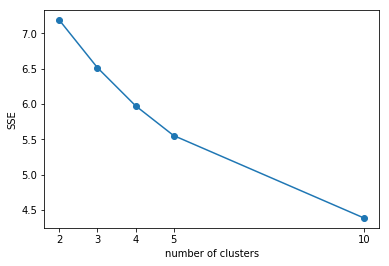

In [114]:
ks = 2,3,4,5,10
SSE = []

for k in ks:
    
    model = KMeans(n_clusters=k)   
    model.fit(Clustering_data)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_)
    
# Plot ks vs inertias
print(SSE)
plt.plot(ks, SSE, '-o')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

# Single

In [115]:
type(Clustering_data)

numpy.ndarray

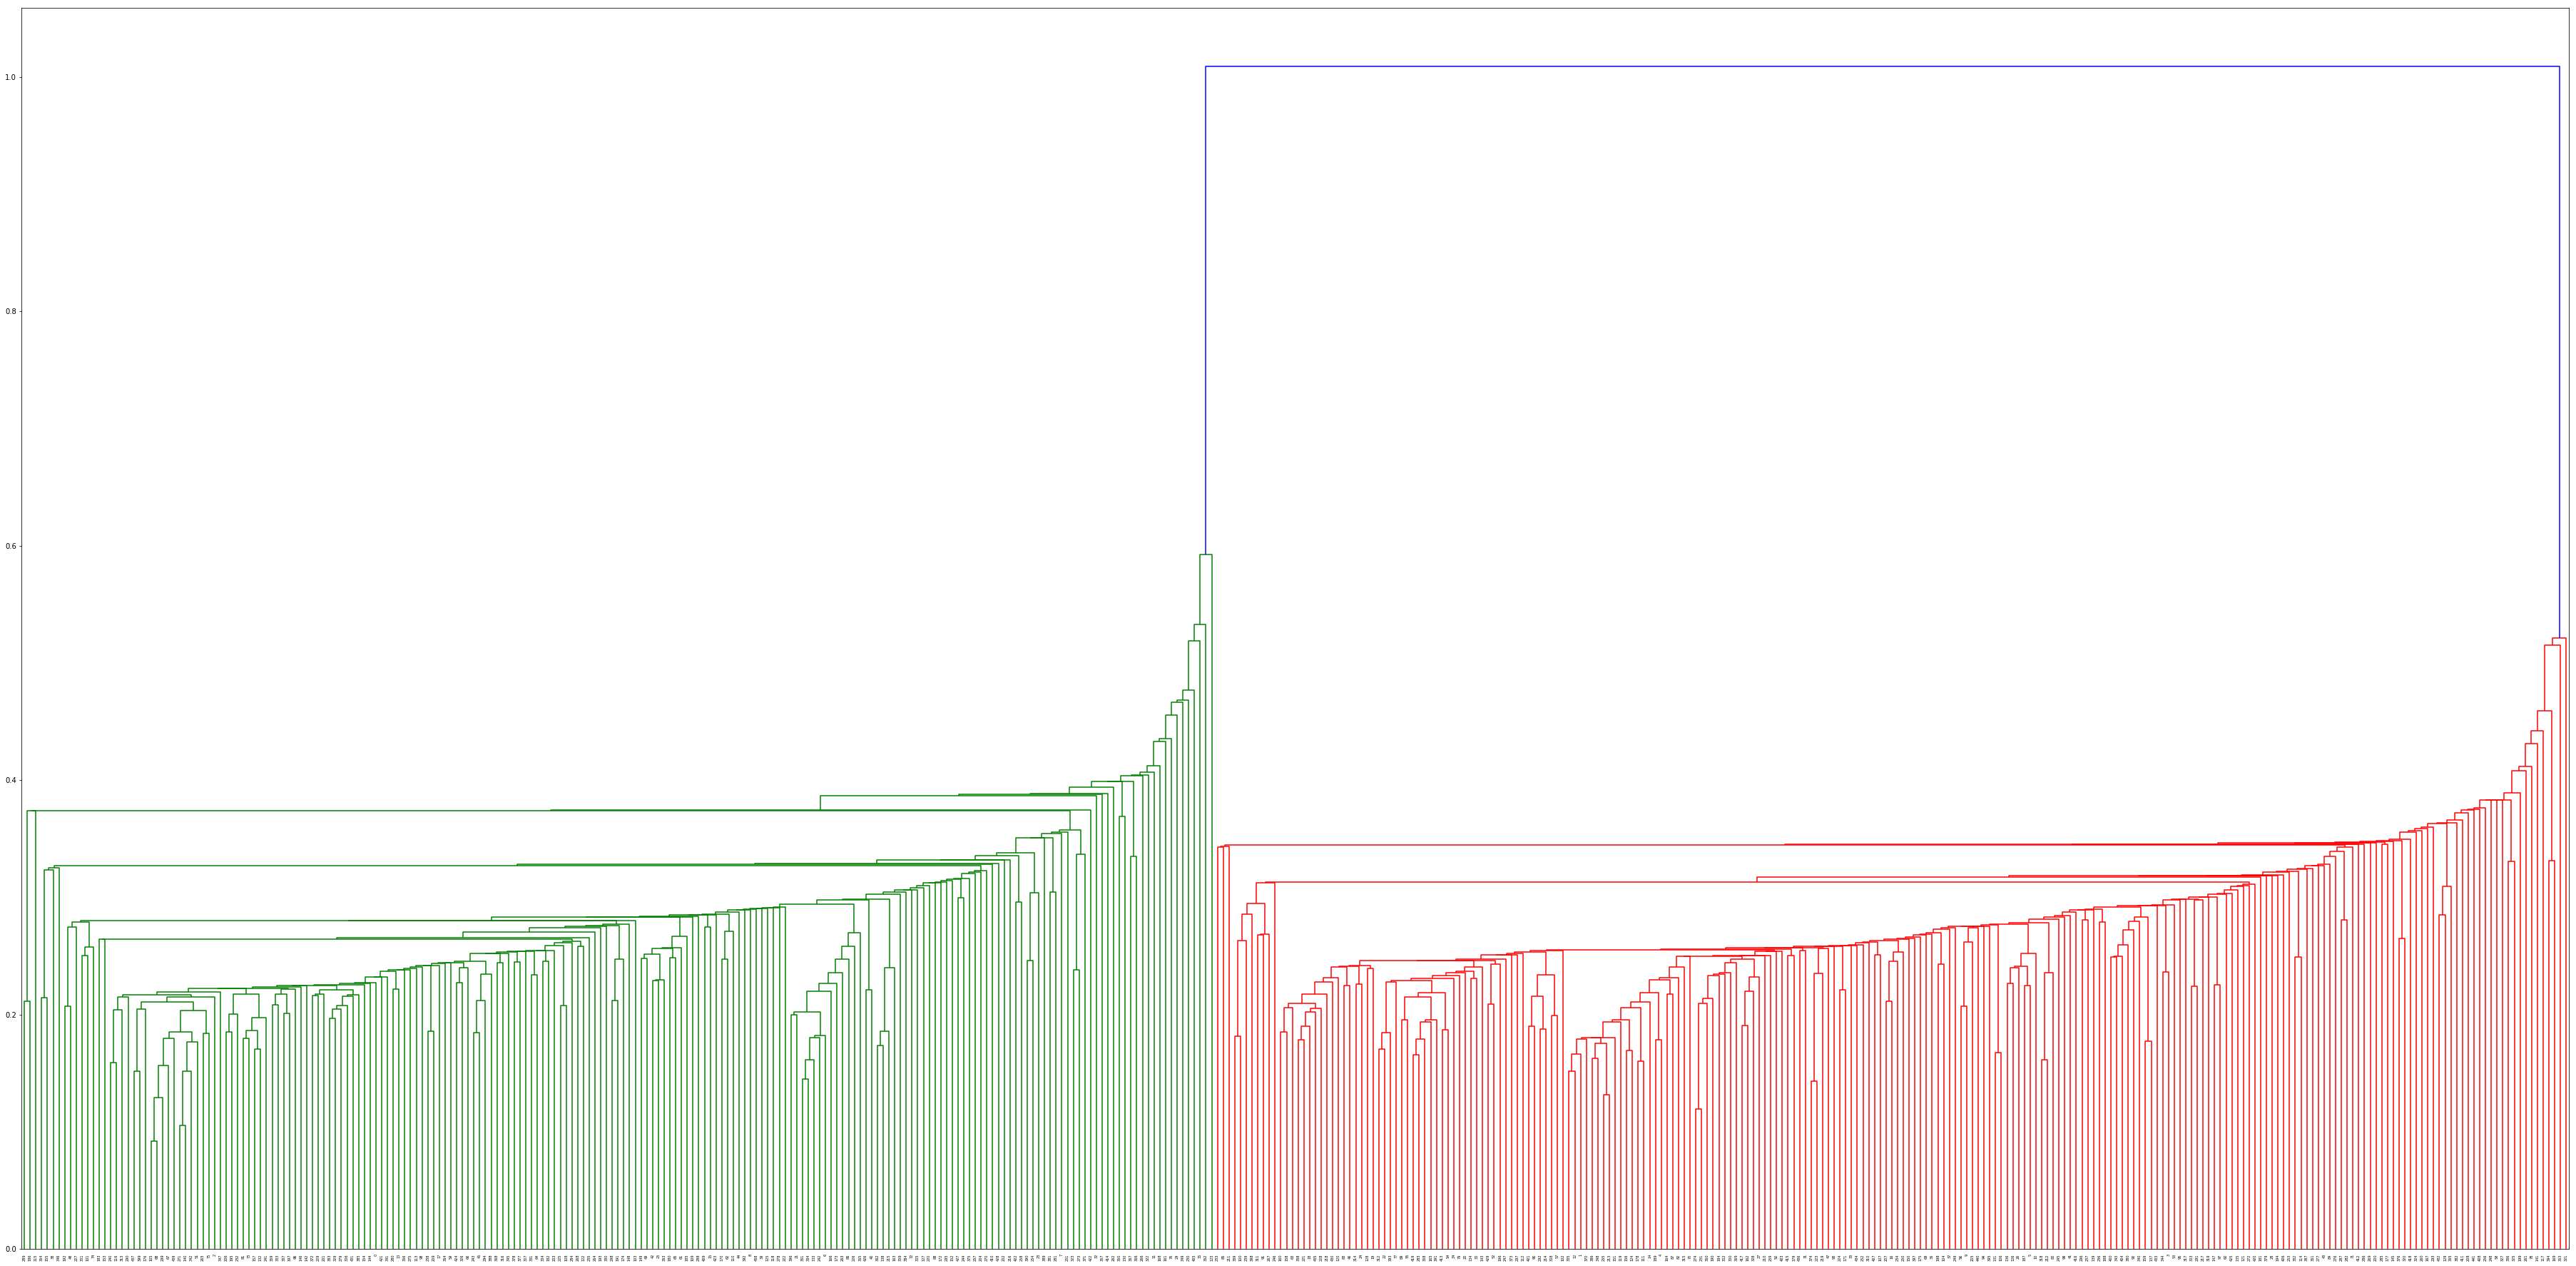

In [116]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked1 = linkage(X, 'single')

labelList = range(len(X))

plt.figure(figsize=(64, 32))  
dendrogram(linked1,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()  

In [118]:
c1=cophenet(linked1,pdist(X))
c1

(0.84095577414631018,
 array([ 1.00873161,  0.22723786,  1.00873161, ...,  1.00873161,
         1.00873161,  0.37457292]))

# Complete

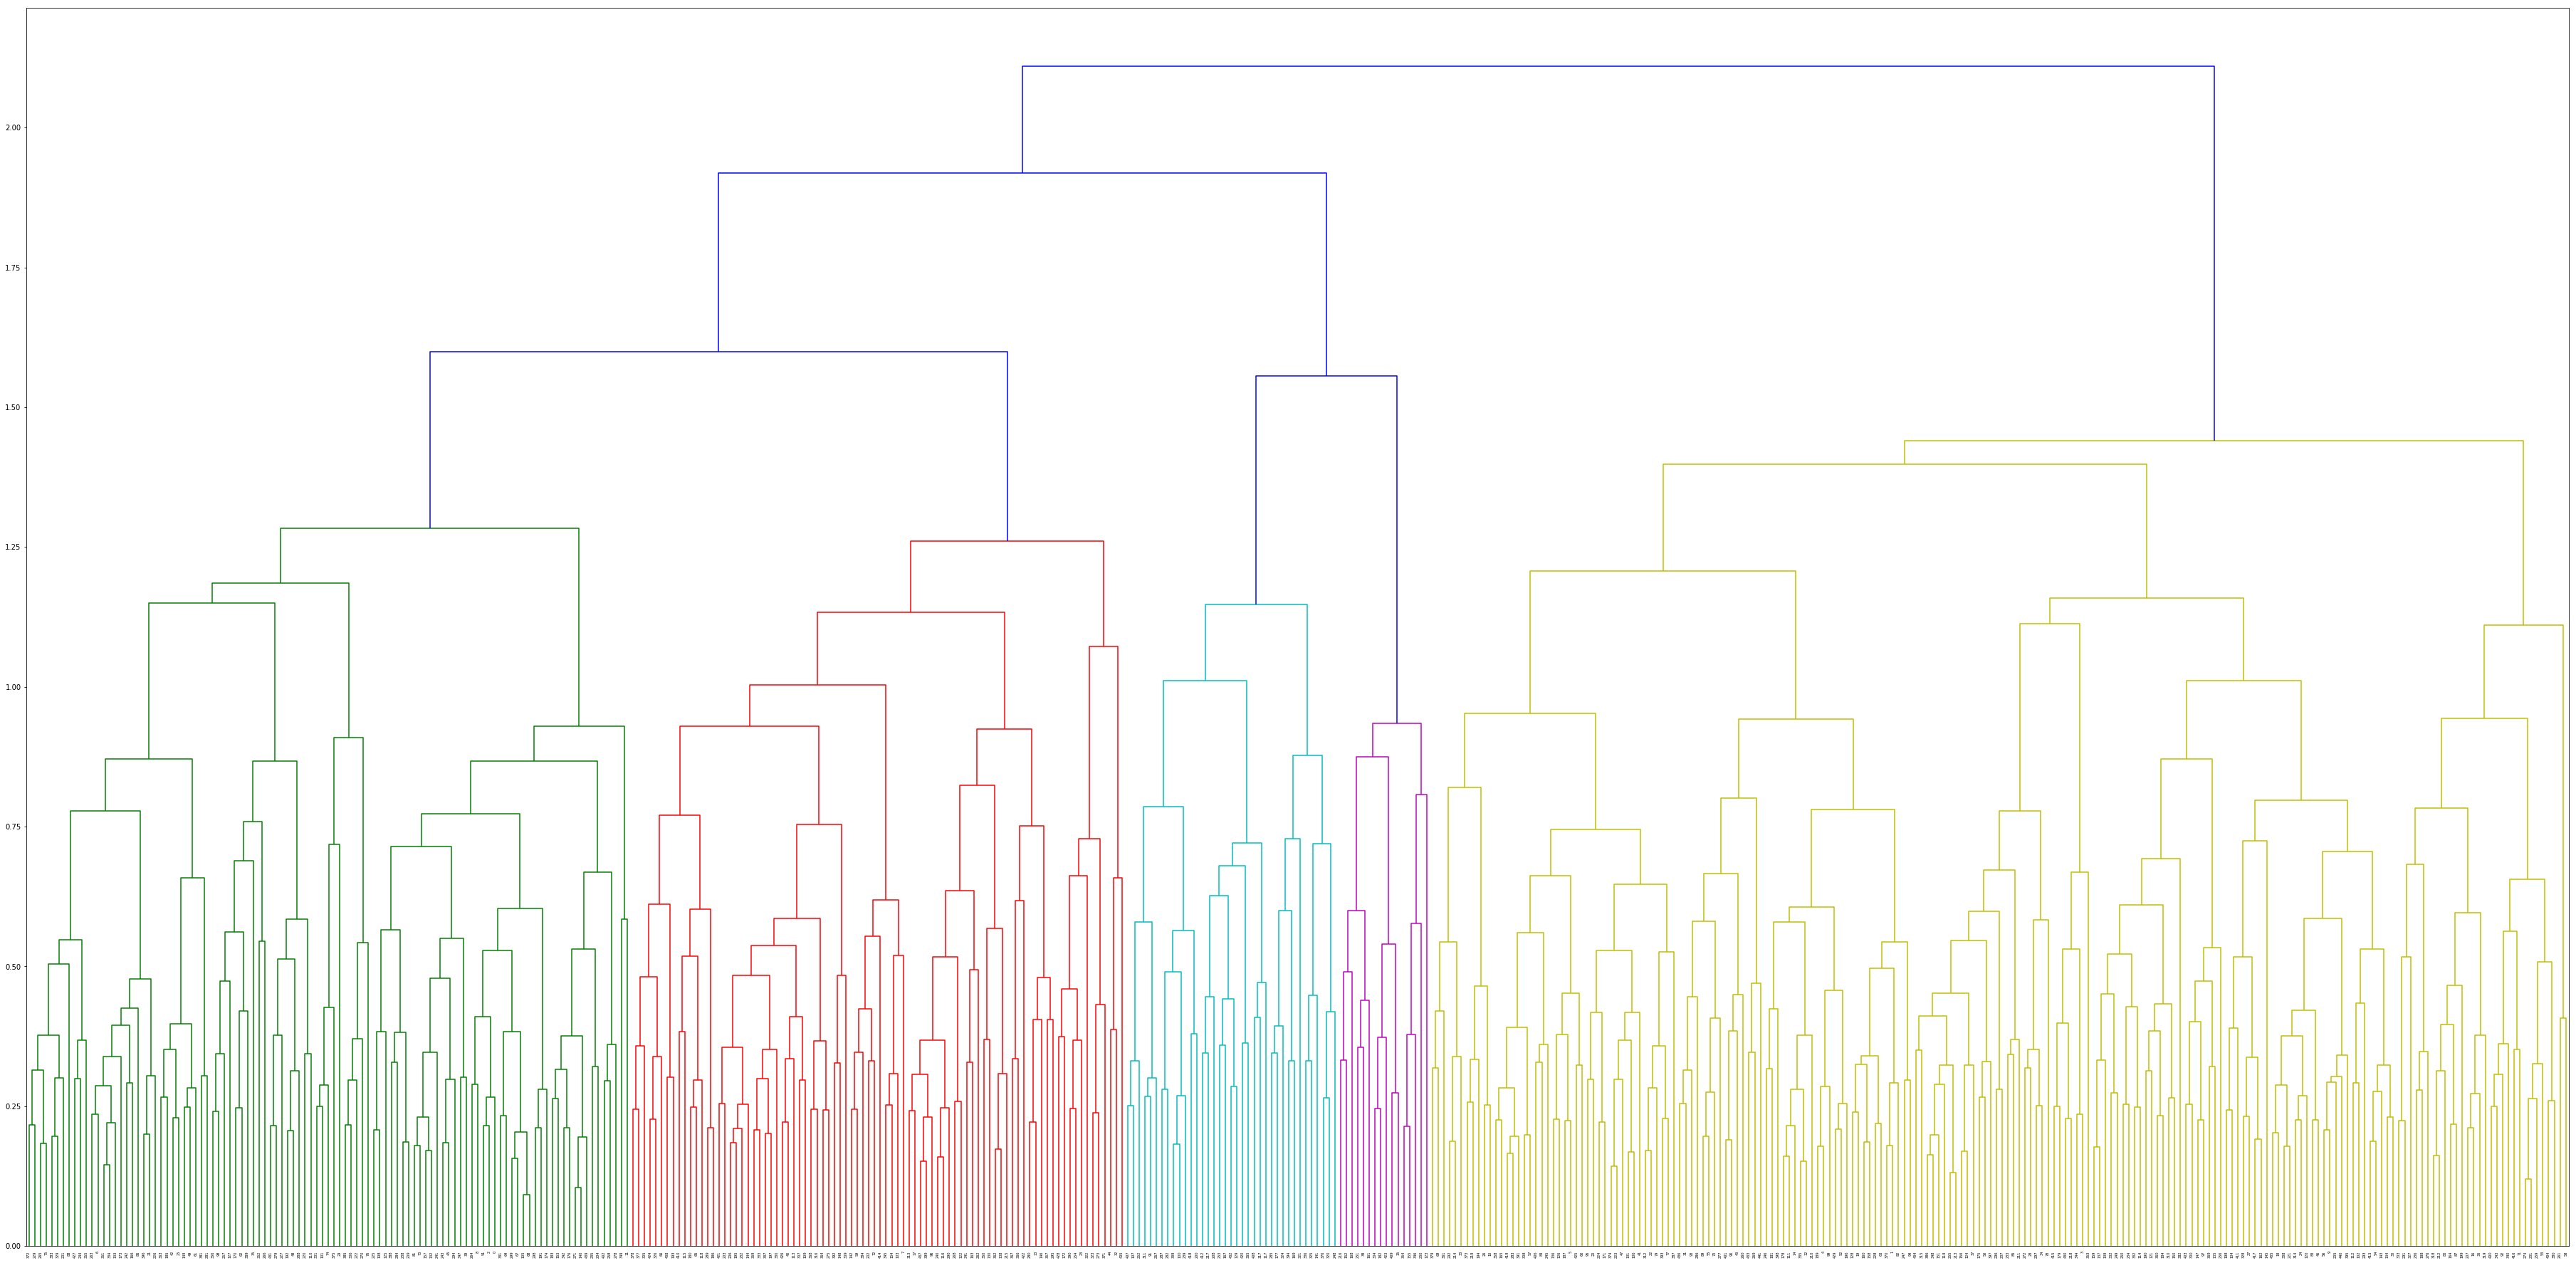

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked2 = linkage(X, 'complete')

labelList = range(len(X))

plt.figure(figsize=(64, 32))  
dendrogram(linked2,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()  

In [120]:
c2=cophenet(linked2,pdist(X))
c2

(0.75006149429620783,
 array([ 2.1093124 ,  0.26605178,  2.1093124 , ...,  2.1093124 ,
         2.1093124 ,  1.39874443]))

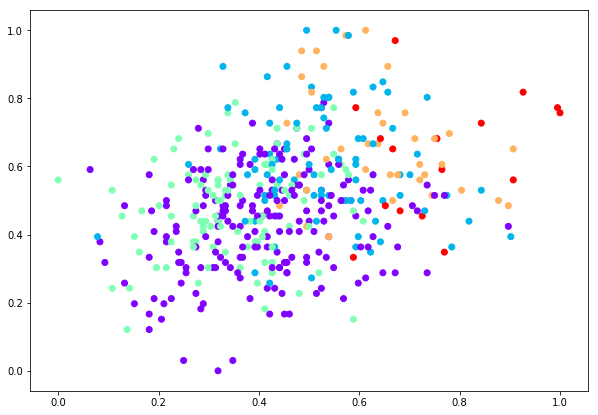

In [121]:
from sklearn.cluster import AgglomerativeClustering
clusters=[]
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
clusters.append(cluster.fit_predict(X)) 
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,4], X[:,9], c=cluster.labels_, cmap='rainbow') 
plt.show()

# Wards' 

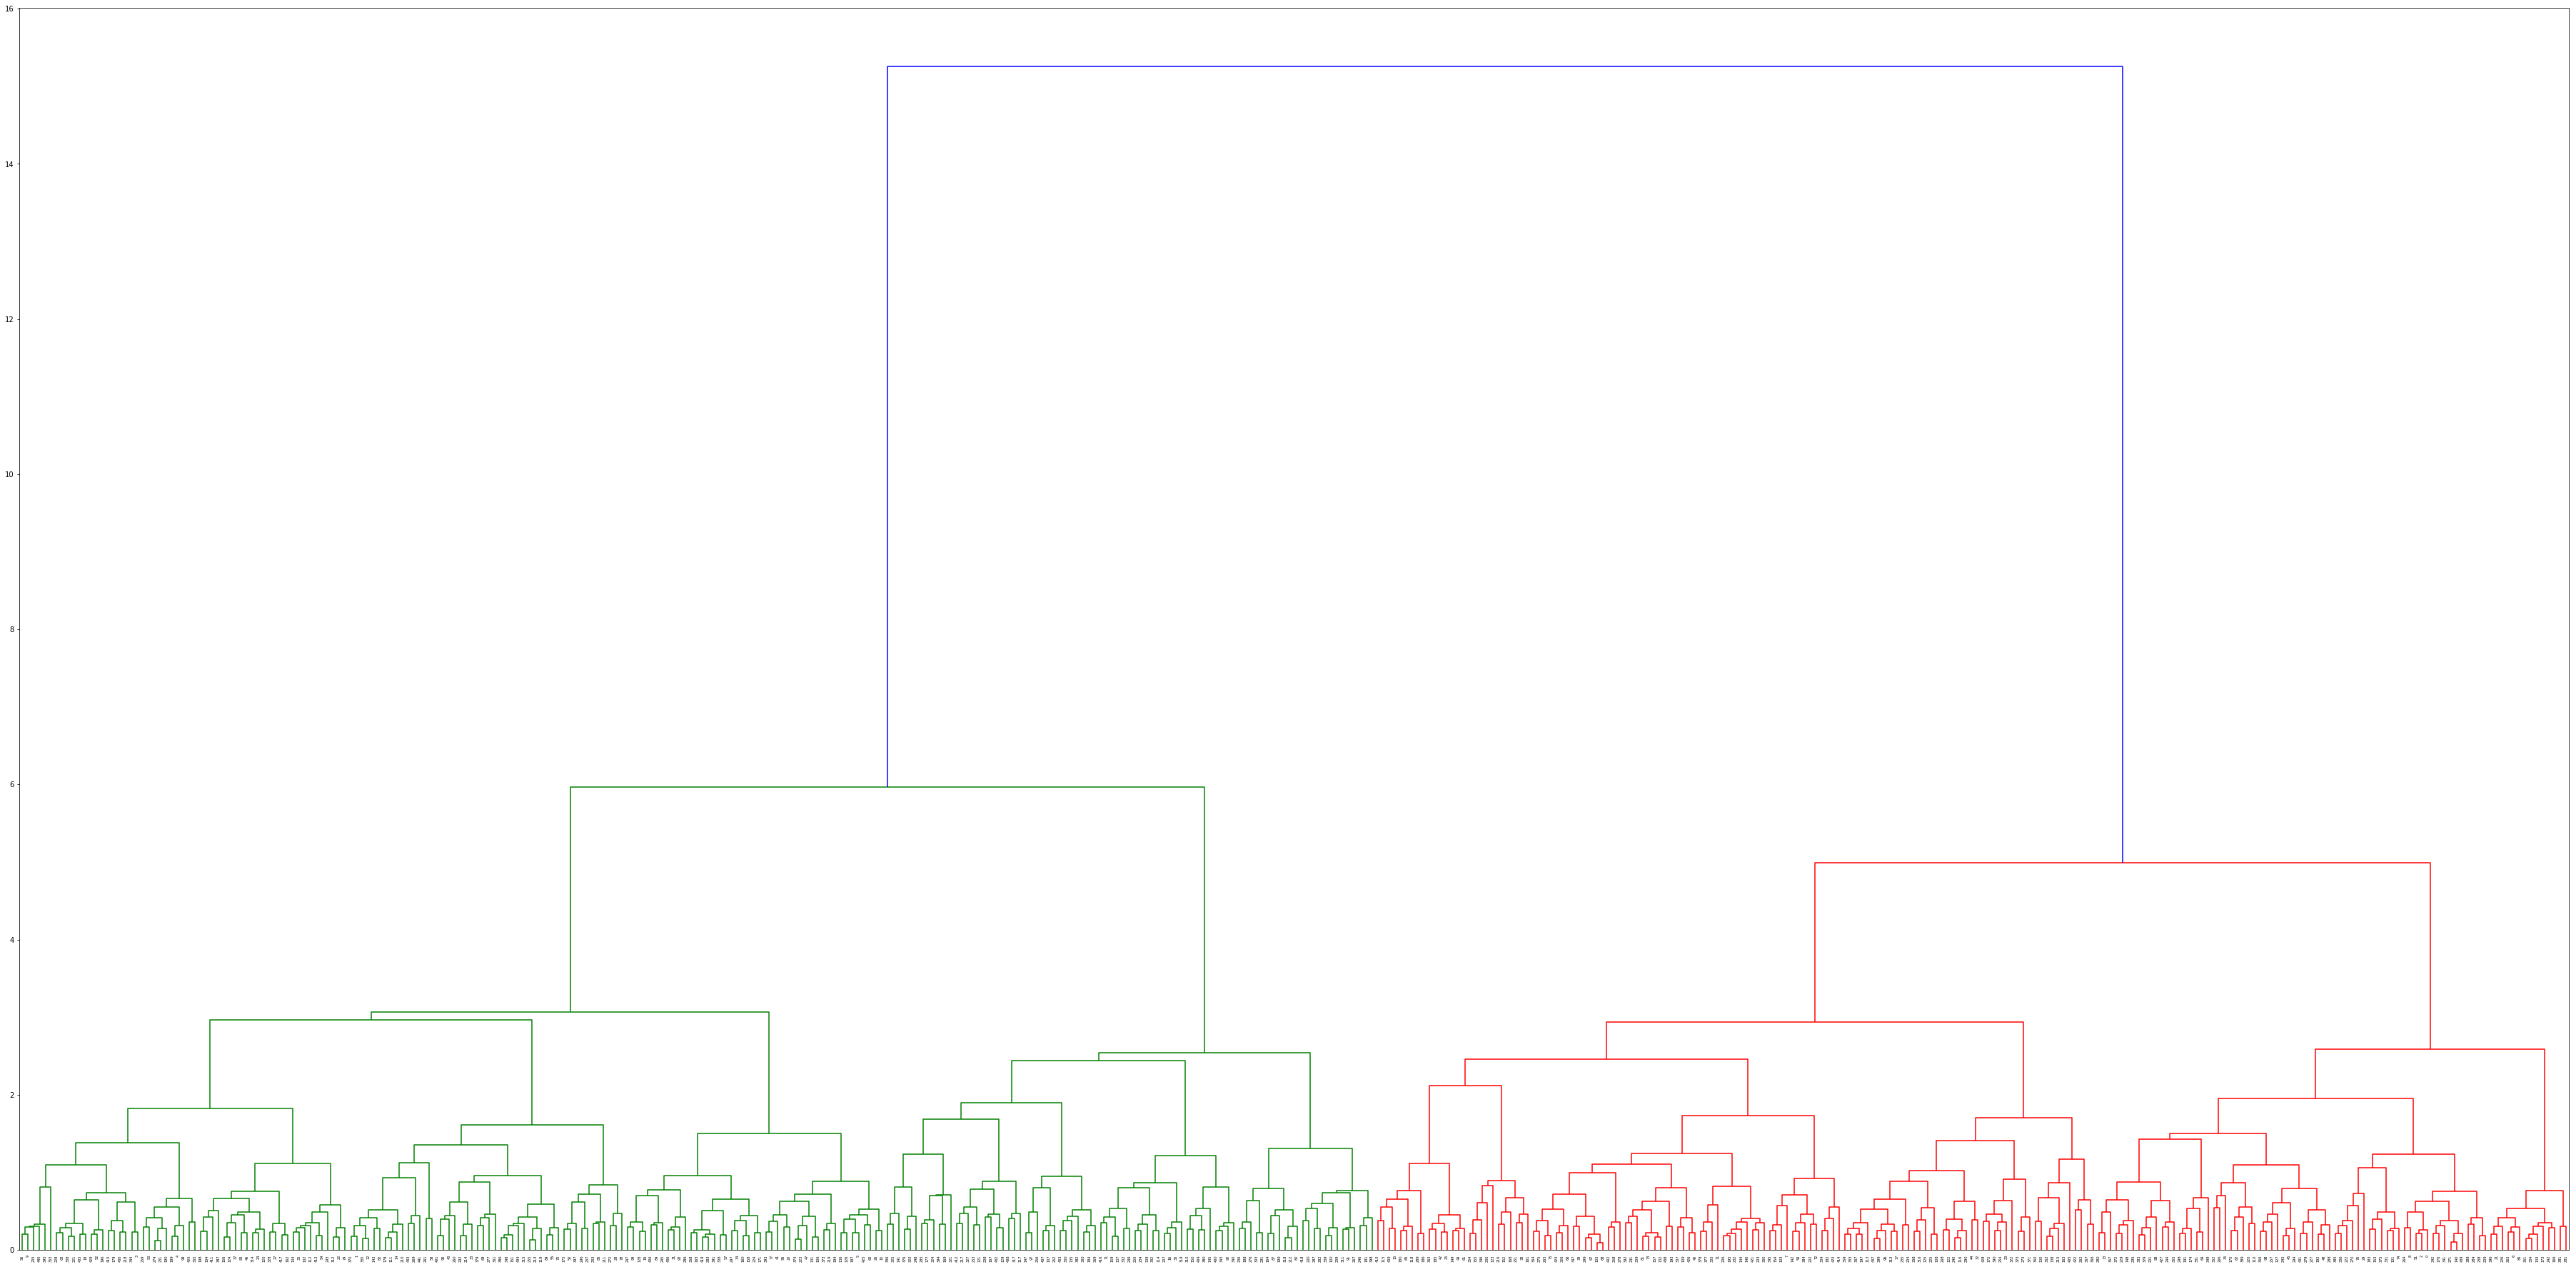

In [122]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

linked3 = linkage(X, 'ward')

labelList = range(len(X))

plt.figure(figsize=(64, 32))  
dendrogram(linked3,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()  

In [127]:
c3=cophenet(linked3,pdist(X))
c3

(0.84562096043579127,
 array([ 15.25204814,   0.25727485,  15.25204814, ...,  15.25204814,
         15.25204814,   2.96656169]))

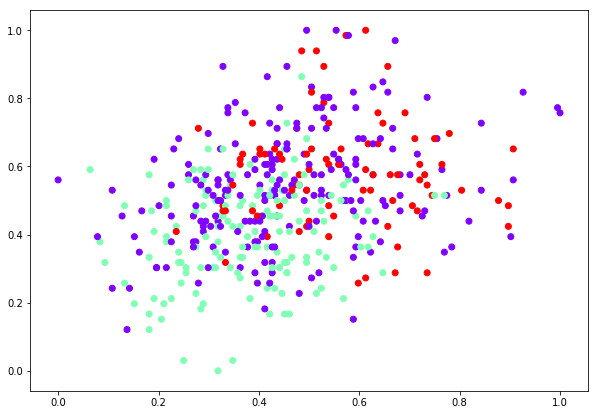

In [123]:
from sklearn.cluster import AgglomerativeClustering
clusters=[]
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clusters.append(cluster.fit_predict(X)) 
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,4], X[:,9], c=cluster.labels_, cmap='rainbow') 
plt.show()

# Average

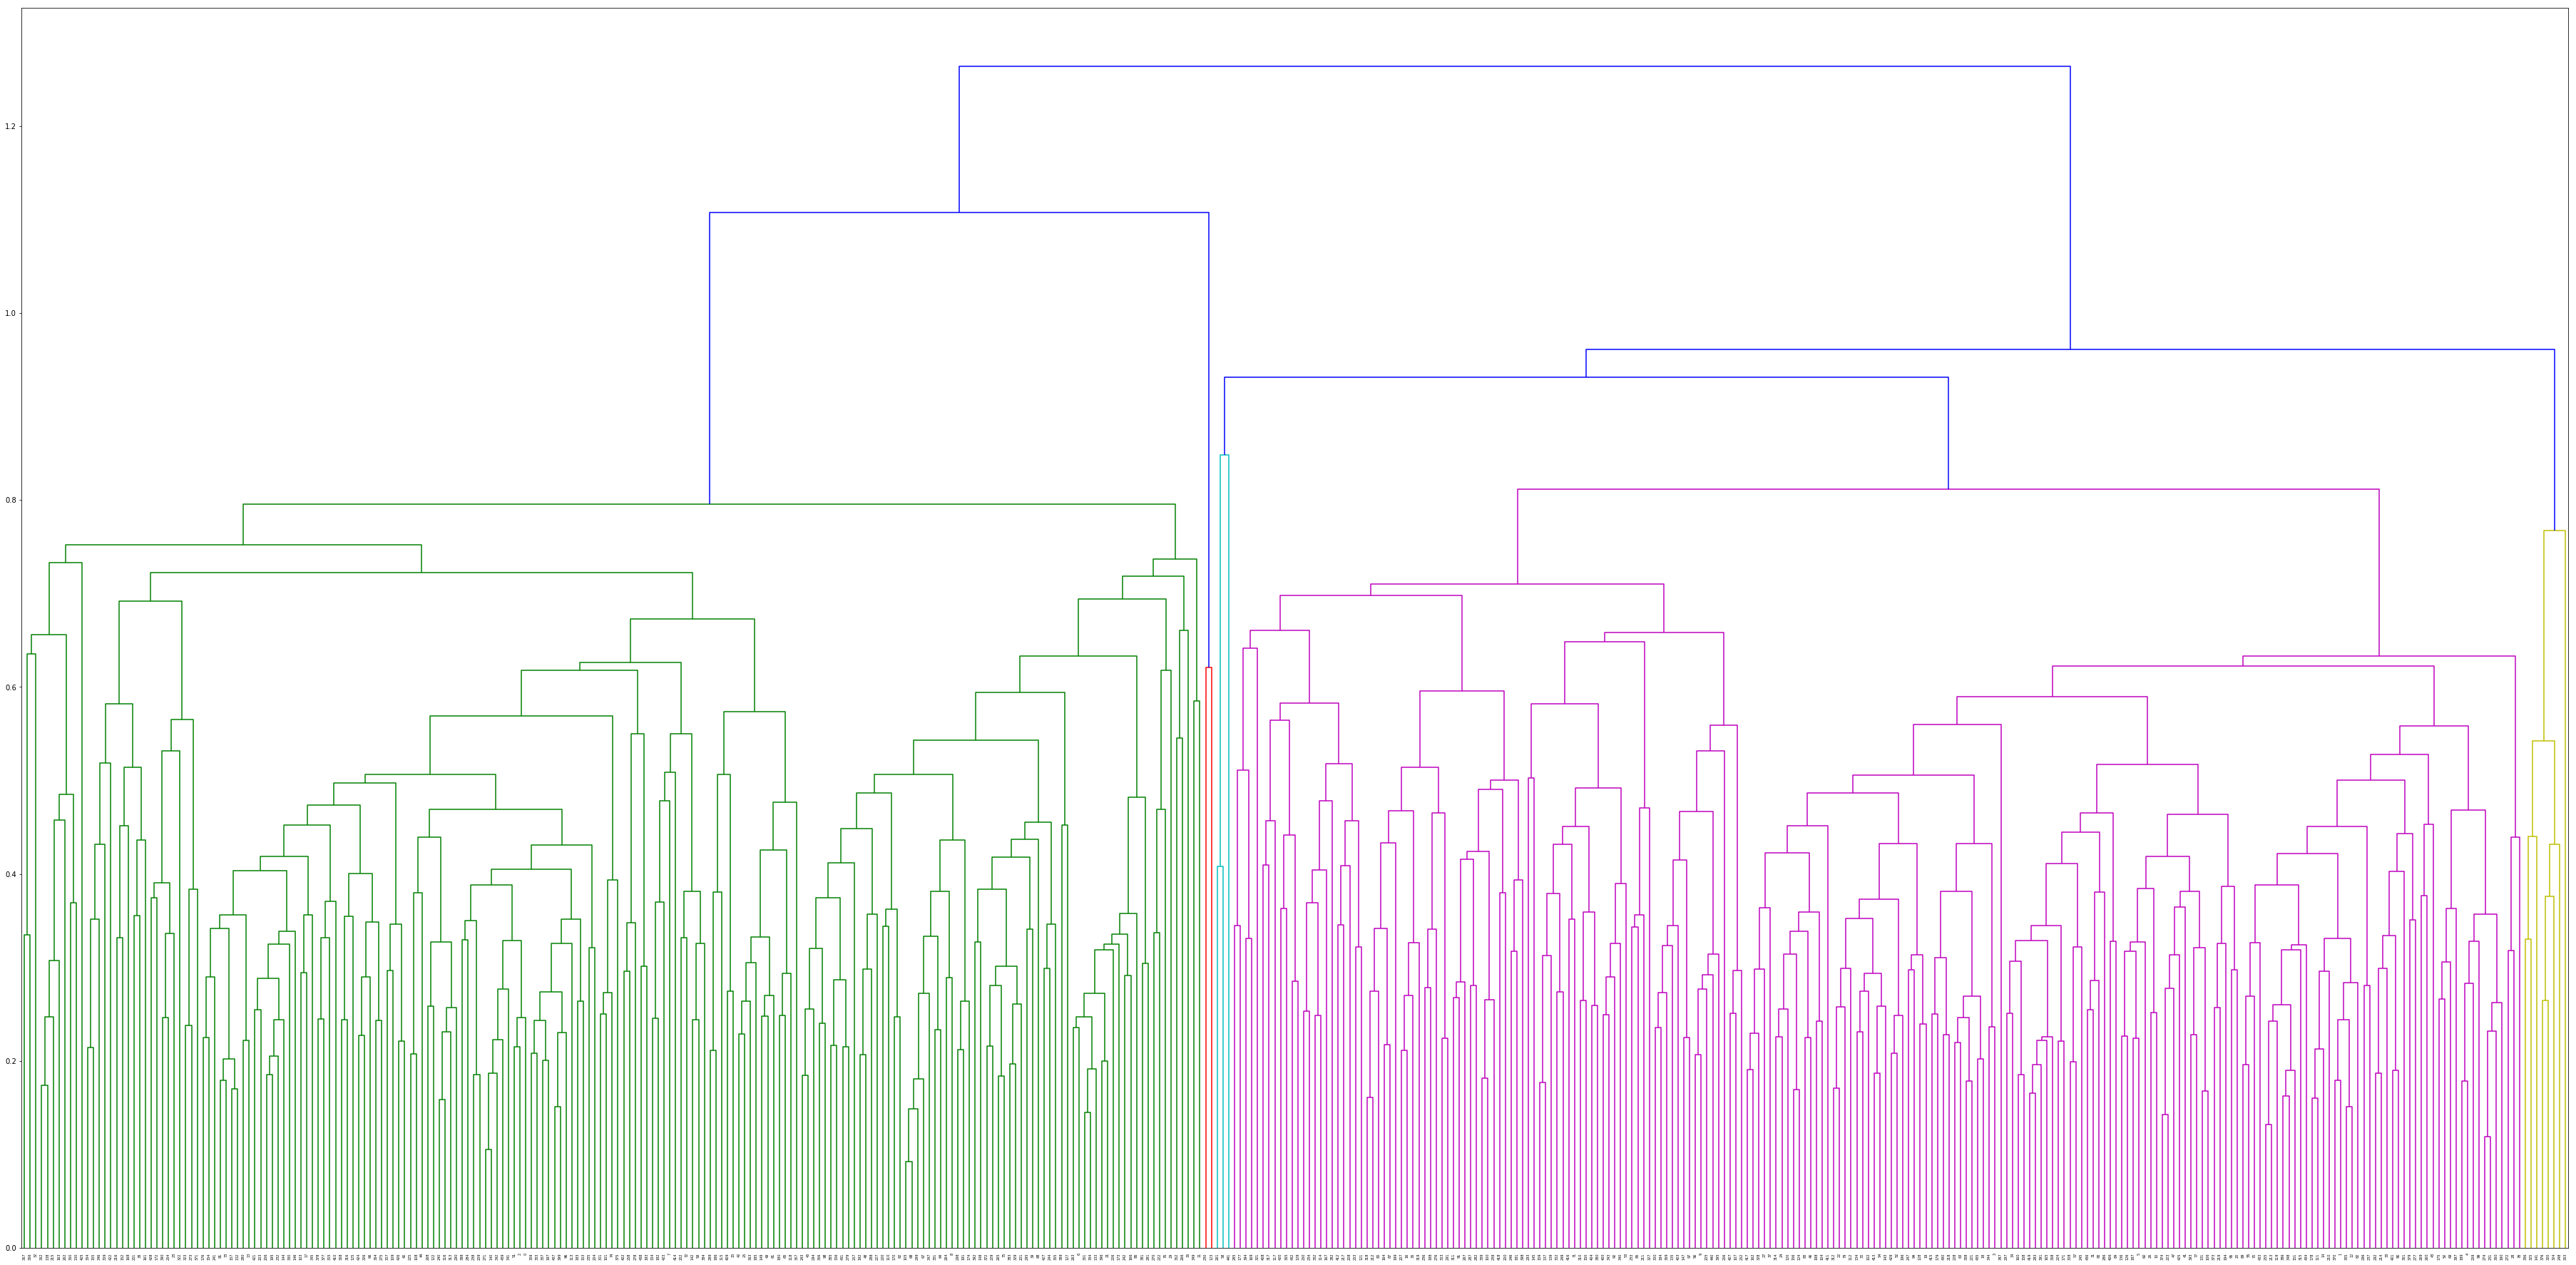

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked4 = linkage(X, 'average')

labelList = range(len(X))

plt.figure(figsize=(64, 32))  
dendrogram(linked4,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
max_d=100
plt.show()  

In [125]:
c4=cophenet(linked4,pdist(X))
c4

(0.86536622405267838,
 array([ 1.26353427,  0.24664482,  1.26353427, ...,  1.26353427,
         1.26353427,  0.93103217]))

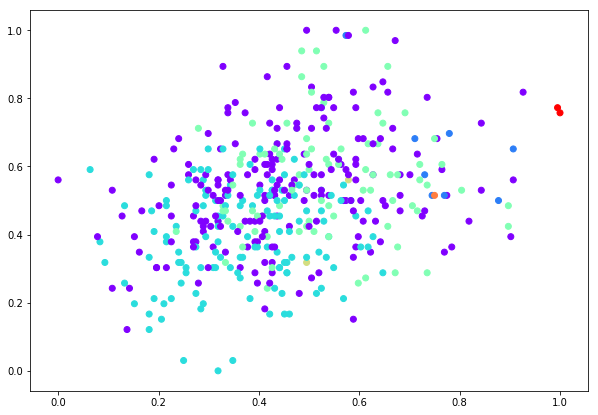

In [126]:
from sklearn.cluster import AgglomerativeClustering
clusters=[]
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')  
clusters.append(cluster.fit_predict(X)) 
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,4], X[:,9], c=cluster.labels_, cmap='rainbow') 
plt.show()